# Machine Learning Workshop
## By Matthew Lee and Matthew Bourgeois

#### First up, you'll need to install Python 3

On windows you can find the latest version here (make sure you get the 64bit version) https://www.python.org/downloads/

On linux follow this tutorial http://docs.python-guide.org/en/latest/starting/install3/linux/

On mac, this tutorial  https://docs.python.org/3/using/mac.html

#### Now, install Tensorflow
TODO

#### Lastly, install matplotlib so that we can graph our results
TODO

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
learning_rate = 0.002
epochs = 10
batch_size = 124

In [18]:
input_nodes = 784 # 28 by 28 pixel image flattened to 784 pixels
hidden_1_nodes = 150
hidden_2_nodes = 80
output_nodes = 10 # Number of classes (0-9)

In [19]:
x = tf.placeholder('float', [None, input_nodes])
y = tf.placeholder('float', [None, output_nodes])

hlw_1 = tf.Variable(tf.random_normal([input_nodes, hidden_1_nodes]))
hlb_1 = tf.Variable(tf.random_normal([hidden_1_nodes]))

hlw_2 = tf.Variable(tf.random_normal([hidden_1_nodes, hidden_2_nodes]))
hlb_2 = tf.Variable(tf.random_normal([hidden_2_nodes]))

outw = tf.Variable(tf.random_normal([hidden_2_nodes, output_nodes]))
outb = tf.Variable(tf.random_normal([output_nodes]))

In [20]:
def forward_propagation(x):
    hlout_1 = tf.nn.sigmoid(tf.matmul(x, hlw_1) + hlb_1)
    hlout_2 = tf.nn.sigmoid(tf.matmul(hlout_1, hlw_2) + hlb_2)
    output = tf.matmul(hlout_2, outw) + outb
    return output

In [21]:
def backward_propagation(y_, y, learning_rate):
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=y_, labels=y) )
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    return optimizer, cost

In [22]:
def calculate_accuracy(y_, y):
    correct = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    return accuracy

In [23]:
y_ = forward_propagation(x)
optimizer, cost = backward_propagation(y_, y, learning_rate)
accuracy = calculate_accuracy(y_, y)

In [24]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [25]:
cost_per_epoch = []
accuracy_per_epoch = []
for epoch in range(epochs):
    epoch_cost = 0
    for _ in range(int(mnist.train.num_examples/batch_size)):
        train_x, train_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y})
        epoch_cost += c
    epoch_accuracy = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
    print('Epoch', epoch + 1, 'completed out of', epochs, '\ncost:', epoch_cost, '\ntraining accuracy:', epoch_accuracy, '\n')
    cost_per_epoch.append(epoch_cost)
    accuracy_per_epoch.append(epoch_accuracy)

Epoch 1 completed out of 10 
cost: 562.025637358 
training accuracy: 0.855218 

Epoch 2 completed out of 10 
cost: 172.923060298 
training accuracy: 0.9098 

Epoch 3 completed out of 10 
cost: 122.834648579 
training accuracy: 0.932873 

Epoch 4 completed out of 10 
cost: 95.7957450151 
training accuracy: 0.946818 

Epoch 5 completed out of 10 
cost: 78.009485241 
training accuracy: 0.955545 

Epoch 6 completed out of 10 
cost: 64.4723437242 
training accuracy: 0.964927 

Epoch 7 completed out of 10 
cost: 53.718372345 
training accuracy: 0.971927 

Epoch 8 completed out of 10 
cost: 45.9608743582 
training accuracy: 0.976309 

Epoch 9 completed out of 10 
cost: 38.8488556966 
training accuracy: 0.981927 

Epoch 10 completed out of 10 
cost: 33.055221105 
training accuracy: 0.985364 



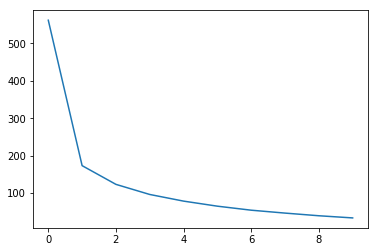

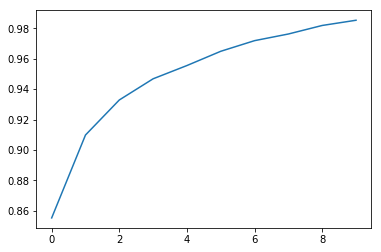

In [26]:
plt.plot(cost_per_epoch)
plt.show()
plt.plot(accuracy_per_epoch)
plt.show()

In [27]:
test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("training accuracy:", accuracy_per_epoch[-1])
print("testing accuracy:", test_accuracy)

training accuracy: 0.985364
testing accuracy: 0.9474
